In [158]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


class Neural_Network(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize=1
        self.hiddenLayerSize=3
        
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)

    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def reluPrime(self,z):
        return 1 * (z > 0)
    
    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward(X)
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2
    

In [159]:
X=np.array(([3,5],[5,1],[10,1]),dtype=float)
y=np.array(([75],[80],[93]),dtype=float)

In [160]:
X


array([[ 3.,  5.],
       [ 5.,  1.],
       [10.,  1.]])

In [161]:
y

array([[75.],
       [80.],
       [93.]])

In [162]:
X=X/np.amax(X,axis=0)
y=y/100

In [163]:
X,y


(array([[0.3, 1. ],
        [0.5, 0.2],
        [1. , 0.2]]),
 array([[0.75],
        [0.8 ],
        [0.93]]))

In [164]:
NN=Neural_Network()

In [165]:
yH=NN.forward(X)

In [166]:
yH

array([[0.7162235 ],
       [0.68791724],
       [0.70900054]])

In [167]:
y

array([[0.75],
       [0.8 ],
       [0.93]])

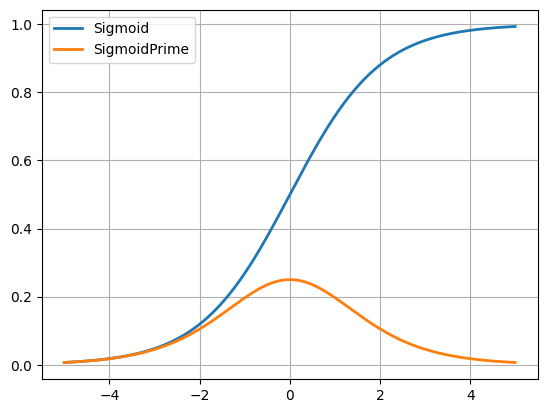

In [168]:
testValues=np.arange(-5,5,0.01)
plt.plot(testValues,NN.sigmoid(testValues),linewidth=2)
plt.plot(testValues, NN.sigmoidPrime(testValues),linewidth=2)
plt.grid(1)
plt.legend(['Sigmoid','SigmoidPrime'])


In [169]:
NN=Neural_Network()

In [170]:
cost1=NN.costFunction(X,y)

In [171]:
cost1

array([0.03063725])

In [172]:
dJdW1,dJdW2=NN.costFunctionPrime(X,y)

In [173]:
dJdW1

array([[-0.00468179, -0.00815531, -0.00655318],
       [-0.00177177, -0.00328928, -0.00241709]])

In [174]:
dJdW2

array([[-0.04028764],
       [-0.05214839],
       [-0.04317081]])

In [175]:
scalar=1
NN.W1 = NN.W1+scalar*dJdW1
NN.W2 = NN.W2+scalar*dJdW2
cost2 = NN.costFunction(X,y)
print (cost1,cost2)

[0.03063725] [0.03754484]


[0.03754484] [0.02253926]


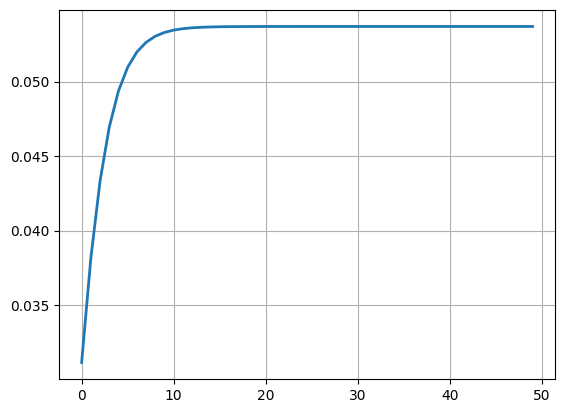

In [177]:
scalar=5
N = 50
NN.W1 = NN.W1-scalar*dJdW1
NN.W2 = NN.W2-scalar*dJdW2
cost3 = NN.costFunction(X,y)
print (cost2,cost3)
costs = []
iterations = []
for i in range(N):
    #dJdW1,dJdW2=NN.costFunctionPrime(X,y)
    NN.W1 = NN.W1-scalar*dJdW1
    NN.W2 = NN.W2-scalar*dJdW2
    cost3 = NN.costFunction(X,y)
    iterations.append(i)
    costs.append(cost3)

plt.plot(iterations, costs, linewidth=2)
plt.grid(1)